# Recomendação de Questões para o Enem
[Projeto Final] Computação Científica e Análise de Dados - 2023.01

Aluno: Diego Vasconcelos Schardosim de Matos

DRE: 120098723

## Introdução

Todo ano temos milhares de alunos do Ensino Médio prestando o Exame Nacional do Ensino Médio (Enem) para tentarem uma vaga às instituições de Ensino Superior. Esta é uma prova que avalia o conhecimento e as habilidades que os estudantes adquiriram ao longo do Ensino Médio, são 180 questões objetivos de quatro áreas do conhecimento e uma redação. 

- Linguagens, Códigos e suas Tecnologias (Língua Portuguesa, Língua Estrangeira, Literatura e Artes);
- Matemática e suas Tecnologias;
- Ciências Humanas (História, Geografia, Sociologia e Filosofia);
- Ciências da Natureza (Biologia, Física e Química).

Fazendo uma análise rápida dos dados encontrado no documento *Press Kit do Enem 2022*, observamos que mais da metade dos inscritos possuem declaração de carência aprovada ou inscrição gratuita. Indicadores de que são pessoas que muito provavelmente não tiveram muitas oportunidade/qualidade de estudo.

Considerando a facilidade de hoje em dia ter acesso a um celular, em ordem de tentar mitigar um pouco este problema proponho neste documento um sistema de recomendação de questões para auxiliar os alunos durante seus estudos.

## Diferentes tipos de Sistema de Recomendação

Sistemas de Recomendação (SR) são conjuntos de algoritmos capazes analisar e identificar padrões de comportamento dos usuários de determinada plataforma e oferecer uma experiência de consumo mais personalizada para os usuários. Dentre as modalidades de filtragem mais comuns, temos:

 - **Colaborativa**: Nesse tipo de mecanismo, os algoritmos usam aprendizado de máquina para prever seus gostos com base em usuários que têm comportamento similar ao seu.
 - **Baseada em conteúdo**: O sistema se baseia em atribuições de um conteúdo, sem depender necessariamente de uma interação de outro usuário. 
 - **Híbrida**: Se vale tanto de algoritmos baseados na interação usuário-usuário quanto nos que avaliam apenas o conteúdo, com o objetivo de formar um sistema de recomendação mais robusto.

Neste projeto estarei interessado em recomendar questões similares a uma já respondida pelo usuário, logo será um **SIstema de Recomendação Baseado em Conteúdo**.

## Como alcançar o objetivo

Para este projeto estarei usando um dataset do meu proprio site (em desenvolvimento) [Prepara Vestibular](https://www.preparavestibular.com.br), os arquivos csv da questão contém todos os metadados que vou usar para a questão como: materia, prova, ano, enunciado. No arquivo csv dos assuntos encontramos todos os assuntos por questão.

A partir desses dados montaremos uma Matriz Documento-Termo (*Document-Term Matrix*) onde cada linha i da matriz é uma questão e as colunas j são os termos/palavras das questões, e o element *ij* será a frequência em que o termo/palavra *j* aparece na questão *i*. Como no exemplo abaixo

In [98]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Duas questões de matemática e uma de história
exemplos = [
    'Durante uma festa de colégio, um grupo de alunos organizou uma rifa. Oitenta alunos faltaram à festa e não participaram da rifa. Entre os que compareceram, alguns compraram três bilhetes, 45 compraram 2 bilhetes, e muitos compraram apenas um. O total de alunos que comprou um único bilhete era 20% do número total de bilhetes vendidos, e o total de bilhetes vendidos excedeu em 33 o número total de alunos do colégio.Quantos alunos compraram somente um bilhete?',
    'Os alunos da disciplina de estatística, em um curso universitário, realizam quatro avaliações por semestre com os pesos de 20%, 10%, 30% e 40%, respectivamente. No final do semestre, precisam obter uma média nas quatro avaliações de, no mínimo, 60 pontos para serem aprovados. Um estudante dessa disciplina obteve os seguintes pontos nas três primeiras avaliações: 46, 60 e 50, respectivamente.O mínimo de pontos que esse estudante precisa obter na quarta avaliação para ser aprovado é',
    'Um dos teóricos da democracia moderna, Hans Kelsen, considera elemento essencial da democracia real (não da democracia ideal, que não existe em lugar algum) o método da seleção dos líderes, ou seja, a eleição. Exemplar, neste sentido, é a afirmação de um juiz da Corte Suprema dos Estados Unidos, por ocasião de uma eleição de 1902: “A cabine eleitoral é o templo das instituições americanas, onde cada um de nós é um sacerdote, ao qual é confiada a guarda da arca da aliança e cada um oficia do seu próprio altar”.BOBBIO, N. Teoria geral da política. Rio de Janeiro: Elsevier, 2000 (adaptado). As metáforas utilizadas no texto referem-se a uma concepção de democracia fundamentada no(a)'
]

vectorizer = CountVectorizer()
count_terms = vectorizer.fit_transform(exemplos)

documentTermMatrix = pd.DataFrame(count_terms.toarray(), index=["Matematica 1", "Matematica 2", "Historia 1"], columns=vectorizer.get_feature_names_out())
documentTermMatrix.head()

,10,1902,20,2000,30,33,40,45,46,50,...,teóricos,total,três,um,uma,unidos,universitário,utilizadas,vendidos,único
Matematica 1,0,0,1,0,0,1,0,1,0,0,...,0,4,1,4,2,0,0,0,2,1
Matematica 2,1,0,1,0,1,0,1,0,1,1,...,0,0,1,2,1,0,1,0,0,0
Historia 1,0,1,0,1,0,0,0,0,0,0,...,1,0,0,5,2,1,0,1,0,0


Podemos visualizar as palavras mais usadas pela sua matriz transposta Termo x Documento

In [99]:
termDocumentMatrix = documentTermMatrix.T
termDocumentMatrix['total_count'] = termDocumentMatrix.sum(axis=1)
termDocumentMatrix = termDocumentMatrix.sort_values(by ='total_count',ascending=False)
print(termDocumentMatrix[:10].to_string())

           Matematica 1  Matematica 2  Historia 1  total_count
de                    6             4           6           16
um                    4             2           5           11
da                    1             1           8           10
alunos                5             1           0            6
uma                   2             1           2            5
total                 4             0           0            4
os                    1             3           0            4
compraram             4             0           0            4
que                   2             1           1            4
no                    0             2           2            4


<Axes: >

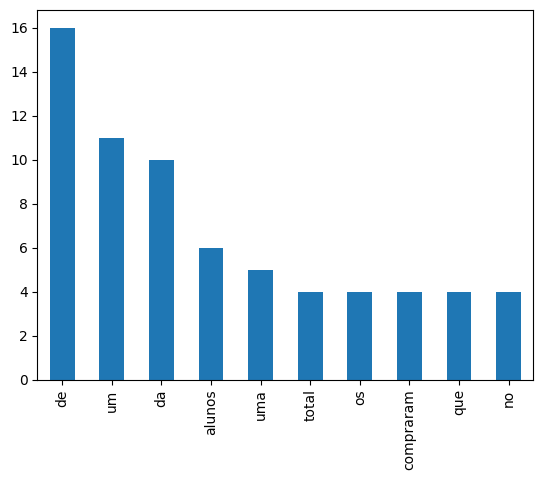

In [100]:
termDocumentMatrix[:10]['total_count'].plot.bar()

Como sabemos, uma Matriz não deixa de ser uma 'coleção' de vetores, olhando para nossa Matriz Termo-Documento anterior, cada linha pode ser interpretada como um vetor diferente. Para um exemplo visual irei escolher os dois termos mais frequentes

In [101]:
documentTermMatrix[["de", "um"]]

,de,um
Matematica 1,6,4
Matematica 2,4,2
Historia 1,6,5


<Axes: xlabel='de', ylabel='um'>

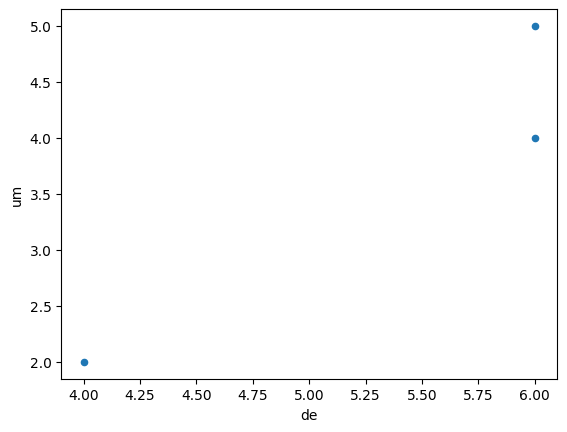

In [102]:
documentTermMatrix.plot.scatter(x='de', y='um')

### Similaridade - Ângulo entre documentos

Há várias formas de se decidir se dois vetores são próximos como, por exemplo, a distancia euclediana. Nesse projeto para decidir se dois vetores são parecidos medindo o ângulo cosseno entre eles, este é um método bem popular.

$$ similarity = cos(\theta)=\frac{\mathbf{A}.\mathbf{B}}{\|\mathbf{A}\|\|\mathbf{B}\|}=\frac{\Sigma_{i=1}^nA_iB_i}{\sqrt{\Sigma_{i=1}^nA_i^2}\sqrt{\Sigma_{i=1}^nB_i^2}} $$

Dessa forma montaremos uma matriz $similaridade_{\text{Documento x Documento}}$ onde o elemento ij quantificará a similaridade entre o documento i para o j

In [103]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(documentTermMatrix)
print(similarity) # Matriz similaridade Document x Documento

[[1.         0.32532068 0.35646452]
 [0.32532068 1.         0.29909765]
 [0.35646452 0.29909765 1.        ]]


**Exemplo Prático**: Qual questão recomendar dado que o aluno respondeu a Questão 2 (de Matemática)

In [104]:
exemplos[1] # Lembrando que essa é a questão 2 de matemática

'Os alunos da disciplina de estatística, em um curso universitário, realizam quatro avaliações por semestre com os pesos de 20%, 10%, 30% e 40%, respectivamente. No final do semestre, precisam obter uma média nas quatro avaliações de, no mínimo, 60 pontos para serem aprovados. Um estudante dessa disciplina obteve os seguintes pontos nas três primeiras avaliações: 46, 60 e 50, respectivamente.O mínimo de pontos que esse estudante precisa obter na quarta avaliação para ser aprovado é'

In [105]:
similarity[1] # Estas são as similaridades da questão 2 entre as outras questões

array([0.32532068, 1.        , 0.29909765])

In [106]:
# Ordenados, quanto maior a similaridade mais proximo é. Porém durante a ordenação o índice j é perdido
sorted(similarity[1], reverse=True)

[0.9999999999999999, 0.3253206802532286, 0.2990976526313236]

In [107]:
# O primeiro item vai ser sempre igual pois é a própria questão, então vou ignora-lo.
# Usando enumerate recuperamos o índice da questão durante a ordenação
sorted(enumerate(similarity[1]), reverse=True, key=lambda x:x[1])[1:3]

[(0, 0.3253206802532286), (2, 0.2990976526313236)]

Dessa forma a questão mais similar que devemos recomendar ao aluno é a de índice 0

In [108]:
exemplos[0]

'Durante uma festa de colégio, um grupo de alunos organizou uma rifa. Oitenta alunos faltaram à festa e não participaram da rifa. Entre os que compareceram, alguns compraram três bilhetes, 45 compraram 2 bilhetes, e muitos compraram apenas um. O total de alunos que comprou um único bilhete era 20% do número total de bilhetes vendidos, e o total de bilhetes vendidos excedeu em 33 o número total de alunos do colégio.Quantos alunos compraram somente um bilhete?'

O que condiz com o esperado, pois questão de matemática deve se relacionar com uma outra questão de matemática

## Resultados

### Forma simples

Entendido todos esses conceitos iremos agora, de fato, realizar o caminho das pedras para implementar uma função 'recomendar' questões, antes disso devemos pre processar nossos

    1. Processamento dos dados: Nesta etapa montaremos uma Matriz Documento-Termo com os enunciados da questão
    2. Calcular Similaridade
    3. Construir método de recomendar questões

In [109]:
questoes = pd.read_csv('questoes.csv')

In [110]:
questoes.head()

,id,materia,prova,ano,enunciado,visibilidade_id
0,1,Matemática,Enem,2022,<p>Uma cozinheira produz docinhos especiais po...,3
1,2,Matemática,Enem,2022,<p>Uma pessoa precisa contratar um operário pa...,3
2,3,Matemática,Enem,2022,<p>O governo de um estado pretende realizar um...,3
3,4,Matemática,Enem,2022,<p>Ao escutar à notícia de que um filme recém-...,3
4,5,Matemática,Enem,2022,"<p>Em uma loja, o preço promocional de uma gel...",3


In [111]:
questoes.drop('visibilidade_id', axis=1)

,id,materia,prova,ano,enunciado
0,1,Matemática,Enem,2022,<p>Uma cozinheira produz docinhos especiais po...
1,2,Matemática,Enem,2022,<p>Uma pessoa precisa contratar um operário pa...
2,3,Matemática,Enem,2022,<p>O governo de um estado pretende realizar um...
3,4,Matemática,Enem,2022,<p>Ao escutar à notícia de que um filme recém-...
4,5,Matemática,Enem,2022,"<p>Em uma loja, o preço promocional de uma gel..."
...,...,...,...,...,...
905,2220,Inglês,Enem,2018,"<p style=""text-align: center;""><span style=""fo..."
906,2221,Inglês,Enem,2018,"<p><strong><span style=""font-size: 14pt;"">TEXT..."
907,2222,Inglês,Enem,2018,"<p style=""padding-left: 40px;"">Don't write in ..."
908,2223,Inglês,Enem,2018,"<p><img style=""display: block; margin-left: au..."


In [112]:
vectorizer = CountVectorizer(lowercase=True)

tags_count = vectorizer.fit_transform(questoes['enunciado'])
print(tags_count.toarray())

[[0 0 0 ... 0 0 0]
 [5 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [113]:
similarity = cosine_similarity(tags_count)
print(similarity)

[[1.         0.01998891 0.29120203 ... 0.03946458 0.0855106  0.00972556]
 [0.01998891 1.         0.03246364 ... 0.1352592  0.22652401 0.22169968]
 [0.29120203 0.03246364 1.         ... 0.12060651 0.2382482  0.07388037]
 ...
 [0.03946458 0.1352592  0.12060651 ... 1.         0.22831651 0.24363727]
 [0.0855106  0.22652401 0.2382482  ... 0.22831651 1.         0.45178123]
 [0.00972556 0.22169968 0.07388037 ... 0.24363727 0.45178123 1.        ]]


In [114]:
# Usaremos a sintaxe abaixo para pesquisar por uma questão.
# Como a matriz de similaridade não trabalha com o id da questão
# mas com o índice, teremos que resgatar o índice dado um id de questao

questoes[questoes['id'] == 12].index[0]

11

In [115]:
questoes.loc[questoes['id'] == 12]

,id,materia,prova,ano,enunciado,visibilidade_id
11,12,Matemática,Enem,2022,<p>Uma pessoa precisa se deslocar de automóvel...,3


In [116]:
questoes.loc[questoes['id'] == 12, "enunciado"].item()

'<p>Uma pessoa precisa se deslocar de automóvel do ponto\xa0P\xa0para o ponto\xa0Q, indicados na figura, na qual as linhas verticais e horizontais simbolizam ruas.\xa0 \xa0</p>\n<p><img style="display: block; margin-left: auto; margin-right: auto;" src="/storage/attachments/questoes/12/nY3qn77luopBTDHAHDhIeuQp95gJQyRT317XlQ72.png"></p>\n<p>Por causa do sentido de tráfego nessas ruas, o caminho poligonal destacado é a possibilidade mais curta de efetuar esse deslocamento. Para descrevê-lo, deve-se especificar qual o sentido a ser tomado em cada cruzamento de ruas, em relação à direção de deslocamento do automóvel, que se movimentará continuamente. Para isso, empregam-se as letras E, F e D para indicar “vire à esquerda”, “siga em frente” e “vire à direita”, respectivamente.</p>\n<p>A sequência de letras que descreve o caminho poligonal destacado é</p>'

In [117]:
def recomendar_simples(questao_id):
    questao_index = questoes[questoes['id'] == questao_id].index[0]
    sugestoes = sorted(enumerate(similarity[questao_index]), reverse=True, key=lambda x:x[1])[1:6]
    result = []
    
    for sugestao in sugestoes:
        sugestao_questao = questoes.iloc[sugestao[0]].id
        result.append(sugestao_questao)
    
    return result

In [118]:
recomendar_simples(12)

[2053, 774, 894, 1323, 3]

In [119]:
questoes.loc[questoes['id'] == 1311]

,id,materia,prova,ano,enunciado,visibilidade_id
391,1311,Matemática,Enem,2020,"<p style=""text-align: justify;"">Três amigos, A...",3


In [120]:
questoes.loc[questoes['id'] == 1311, "enunciado"].item()

'<p style="text-align: justify;">Três amigos, André, Bernardo e Carlos, moram em um condomínio fechado de uma cidade. O quadriculado representa a localização das ruas paralelas e perpendiculares, delimitando quadras de mesmo tamanho nesse condomínio, em que nos pontos A, B e C estão localizadas as casas de André, Bernardo e Carlos, respectivamente.</p>\n<p><img style="display: block; margin-left: auto; margin-right: auto;" src="/storage/attachments/questoes/1311/pP8f4xcJhjxiIYMQ5wqtaNg3QRczWA8AiJr1mJep.png"></p>\n<p style="text-align: justify;">André deseja deslocar-se da sua casa até a casa de Bernardo, sem passar pela casa de Carlos, seguindo ao longo das ruas do condomínio, fazendo sempre deslocamentos para a direita ( → ) ou para cima ( ↑ ), segundo o esquema da figura.</p>\n<p style="text-align: justify;">O número de diferentes caminhos que André poderá utilizar para realizar o deslocamento nas condições propostas é</p>'

Perceba que este método simples nos recomendou uma questão bem parecida com a entrada. Mas seria então esta a melhor abordagem? Bem, podemos melhorar nossa Matriz Documento-Termo, pois, se reparamos bem não estamos usando todos nossos metadados, deixando assim a recomendação mais precisa.

### Refinando o processo

Apesar do nome, a Matriz Documento-Termo não está obrigatoriamente restrita apenas a termos do documento, na prática as frequência da palavras atuam como pesos indicando quanto aquela característica é importante para a questão. Com isso em mente, adicionaremos todos os metadados a matriz Documento-Termo: prova, ano e assuntos. E assim iremos analisar se a recomendação será mais coerente.

In [121]:
assuntos = pd.read_csv('assuntos.csv')

In [122]:
assuntos.head()

,id,questao_id,assunto
0,1,1,Aritmética e Problemas
1,2,1,Regra de Três
2,3,2,Aritmética e Problemas
3,4,2,Sistemas de Numeração e Operações Fundamentais
4,5,3,Análise de Tabelas e Gráficos


In [123]:
def add_assuntos_to_questao(questao):
    questao['assuntos'] = assuntos.loc[assuntos['questao_id'] == questao.id].assunto.values
    
    return questao

In [124]:
# Criaremos uma nova coluna chamada 'assuntos' no documento
# das questões que será uma lista com os assuntos da questão

questoes_with_assuntos = questoes.apply(add_assuntos_to_questao, axis=1)
questoes_with_assuntos.head()

,id,materia,prova,ano,enunciado,visibilidade_id,assuntos
0,1,Matemática,Enem,2022,<p>Uma cozinheira produz docinhos especiais po...,3,"[Aritmética e Problemas, Regra de Três]"
1,2,Matemática,Enem,2022,<p>Uma pessoa precisa contratar um operário pa...,3,"[Aritmética e Problemas, Sistemas de Numeração..."
2,3,Matemática,Enem,2022,<p>O governo de um estado pretende realizar um...,3,[Análise de Tabelas e Gráficos]
3,4,Matemática,Enem,2022,<p>Ao escutar à notícia de que um filme recém-...,3,"[Aritmética e Problemas, Sistemas de Numeração..."
4,5,Matemática,Enem,2022,"<p>Em uma loja, o preço promocional de uma gel...",3,[Matemática Financeira]


In [125]:
# Para evitar que o método conte, por exemplo: 'Aritmética', 'e', 'Problemas'
# como coisas separadas, estarei concatenando as strings formando uma nova.

questoes_with_assuntos['assuntos'] = questoes_with_assuntos['assuntos'].apply(lambda x:[i.replace(" ", "") for i in x])
questoes_with_assuntos.head()

,id,materia,prova,ano,enunciado,visibilidade_id,assuntos
0,1,Matemática,Enem,2022,<p>Uma cozinheira produz docinhos especiais po...,3,"[AritméticaeProblemas, RegradeTrês]"
1,2,Matemática,Enem,2022,<p>Uma pessoa precisa contratar um operário pa...,3,"[AritméticaeProblemas, SistemasdeNumeraçãoeOpe..."
2,3,Matemática,Enem,2022,<p>O governo de um estado pretende realizar um...,3,[AnálisedeTabelaseGráficos]
3,4,Matemática,Enem,2022,<p>Ao escutar à notícia de que um filme recém-...,3,"[AritméticaeProblemas, SistemasdeNumeraçãoeOpe..."
4,5,Matemática,Enem,2022,"<p>Em uma loja, o preço promocional de uma gel...",3,[MatemáticaFinanceira]


In [126]:
# Como nosso método trabalha com texto, vou converter
# essa lista em uma string, separada por espaço

questoes_with_assuntos['assuntos'] = questoes_with_assuntos['assuntos'].apply(lambda x:" ".join(x))
questoes_with_assuntos.head()

,id,materia,prova,ano,enunciado,visibilidade_id,assuntos
0,1,Matemática,Enem,2022,<p>Uma cozinheira produz docinhos especiais po...,3,AritméticaeProblemas RegradeTrês
1,2,Matemática,Enem,2022,<p>Uma pessoa precisa contratar um operário pa...,3,AritméticaeProblemas SistemasdeNumeraçãoeOpera...
2,3,Matemática,Enem,2022,<p>O governo de um estado pretende realizar um...,3,AnálisedeTabelaseGráficos
3,4,Matemática,Enem,2022,<p>Ao escutar à notícia de que um filme recém-...,3,AritméticaeProblemas SistemasdeNumeraçãoeOpera...
4,5,Matemática,Enem,2022,"<p>Em uma loja, o preço promocional de uma gel...",3,MatemáticaFinanceira


### Limpando nossa Matriz

Além de considerar todas essas características, é importante ressaltar que quando trabalhando com texto, existem muitas palavras semanticamente similares que acabam sendo contadas de uma maneira não desejável. Usando a técnica de stemming iremos analisar cada palavra individualmente e reduzi-la à sua raiz ou, como é chamada na técnica, o seu **stem**.

Além disso também temos as chamadas **stop_words**, que é a técnica para remover ruídos no texto como os conectivos "que", "o", "a", "de", entre outros.

1. Remover caracteres especiais
2. Remover os números
3. Remover ruídos do texto, as chamadas stop_words
4. Reduzir as palavras para sua raiz por Stemming

In [127]:
# Removendo tags html

import re

regex = re.compile('<[^<]+?>')

def remove_html(text):
    return re.sub(regex, '', text)

questoes_cleaned = questoes_with_assuntos.copy()
questoes_cleaned['enunciado'] = questoes_cleaned['enunciado'].apply(remove_html)
questoes_cleaned.head()

,id,materia,prova,ano,enunciado,visibilidade_id,assuntos
0,1,Matemática,Enem,2022,Uma cozinheira produz docinhos especiais por e...,3,AritméticaeProblemas RegradeTrês
1,2,Matemática,Enem,2022,Uma pessoa precisa contratar um operário para ...,3,AritméticaeProblemas SistemasdeNumeraçãoeOpera...
2,3,Matemática,Enem,2022,O governo de um estado pretende realizar uma o...,3,AnálisedeTabelaseGráficos
3,4,Matemática,Enem,2022,Ao escutar à notícia de que um filme recém-lan...,3,AritméticaeProblemas SistemasdeNumeraçãoeOpera...
4,5,Matemática,Enem,2022,"Em uma loja, o preço promocional de uma gelade...",3,MatemáticaFinanceira


In [128]:
questoes_cleaned.enunciado.str.strip()
questoes_cleaned.head()

,id,materia,prova,ano,enunciado,visibilidade_id,assuntos
0,1,Matemática,Enem,2022,Uma cozinheira produz docinhos especiais por e...,3,AritméticaeProblemas RegradeTrês
1,2,Matemática,Enem,2022,Uma pessoa precisa contratar um operário para ...,3,AritméticaeProblemas SistemasdeNumeraçãoeOpera...
2,3,Matemática,Enem,2022,O governo de um estado pretende realizar uma o...,3,AnálisedeTabelaseGráficos
3,4,Matemática,Enem,2022,Ao escutar à notícia de que um filme recém-lan...,3,AritméticaeProblemas SistemasdeNumeraçãoeOpera...
4,5,Matemática,Enem,2022,"Em uma loja, o preço promocional de uma gelade...",3,MatemáticaFinanceira


In [129]:
# Pontuação e acentuação

questoes_cleaned['enunciado'] = questoes_cleaned['enunciado'].replace('[,.:;!?]+', ' ', regex=True) 
questoes_cleaned.head()

,id,materia,prova,ano,enunciado,visibilidade_id,assuntos
0,1,Matemática,Enem,2022,Uma cozinheira produz docinhos especiais por e...,3,AritméticaeProblemas RegradeTrês
1,2,Matemática,Enem,2022,Uma pessoa precisa contratar um operário para ...,3,AritméticaeProblemas SistemasdeNumeraçãoeOpera...
2,3,Matemática,Enem,2022,O governo de um estado pretende realizar uma o...,3,AnálisedeTabelaseGráficos
3,4,Matemática,Enem,2022,Ao escutar à notícia de que um filme recém-lan...,3,AritméticaeProblemas SistemasdeNumeraçãoeOpera...
4,5,Matemática,Enem,2022,Em uma loja o preço promocional de uma gelade...,3,MatemáticaFinanceira


In [130]:
# Removendo caracteres especiais

questoes_cleaned['enunciado'] = questoes_cleaned['enunciado'].replace('[/<>()|\+\-\$%&#@\'\"]+', ' ', regex=True)
questoes_cleaned.head()

,id,materia,prova,ano,enunciado,visibilidade_id,assuntos
0,1,Matemática,Enem,2022,Uma cozinheira produz docinhos especiais por e...,3,AritméticaeProblemas RegradeTrês
1,2,Matemática,Enem,2022,Uma pessoa precisa contratar um operário para ...,3,AritméticaeProblemas SistemasdeNumeraçãoeOpera...
2,3,Matemática,Enem,2022,O governo de um estado pretende realizar uma o...,3,AnálisedeTabelaseGráficos
3,4,Matemática,Enem,2022,Ao escutar à notícia de que um filme recém lan...,3,AritméticaeProblemas SistemasdeNumeraçãoeOpera...
4,5,Matemática,Enem,2022,Em uma loja o preço promocional de uma gelade...,3,MatemáticaFinanceira


In [131]:
# Removendo números

questoes_cleaned['enunciado'] = questoes_cleaned['enunciado'].replace('[0-9]+', ' ', regex=True)
questoes_cleaned.head()

,id,materia,prova,ano,enunciado,visibilidade_id,assuntos
0,1,Matemática,Enem,2022,Uma cozinheira produz docinhos especiais por e...,3,AritméticaeProblemas RegradeTrês
1,2,Matemática,Enem,2022,Uma pessoa precisa contratar um operário para ...,3,AritméticaeProblemas SistemasdeNumeraçãoeOpera...
2,3,Matemática,Enem,2022,O governo de um estado pretende realizar uma o...,3,AnálisedeTabelaseGráficos
3,4,Matemática,Enem,2022,Ao escutar à notícia de que um filme recém lan...,3,AritméticaeProblemas SistemasdeNumeraçãoeOpera...
4,5,Matemática,Enem,2022,Em uma loja o preço promocional de uma gelade...,3,MatemáticaFinanceira


In [132]:
import nltk
nltk.download('rslp')
nltk.download('stopwords')

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\Diego\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Diego\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [133]:
stemmer = nltk.stem.RSLPStemmer()

In [134]:
def stem(text):
    y = []
    
    for i in text.split():
        y.append(stemmer.stem(i))
        
    return " ".join(y)

In [135]:
# Nos interessa realizar stemming apenas no enunciado, pois as outras colunas 
# são metadados que sabemos que são relevantes e não precisams de stemming

questoes_cleaned['enunciado'] = questoes_cleaned['enunciado'].apply(stem);
questoes_cleaned['enunciado']

0      uma cozinh produz doc espec por encomend us um...
1      uma pesso precis contrat um oper par faz um se...
2      o govern de um est pretend realiz uma obr de i...
3      ao escut à notíc de que um film recém lanç arr...
4      em uma loj o preç promoc de uma gelad é de r\ ...
                             ...                        
905    excerpt ‘i it your opinion winston that the pa...
906    text i a fre world clas education for anyon an...
907    don t writ in english they said english is not...
908    glasbergen r dispon em www glasbergen com aces...
909    lav mae creating show on wheel for the homeles...
Name: enunciado, Length: 910, dtype: object

In [136]:
# Um novo documento que é a união entre as colunas interessantes
# para o nosso sistema.

tags = questoes_cleaned['materia'] + " " + questoes_cleaned['prova'] + " " + questoes_cleaned['ano'].astype(str) + " "  + questoes_cleaned['enunciado'] + " " + questoes_cleaned['assuntos']
tags.head()

0    Matemática Enem 2022 uma cozinh produz doc esp...
1    Matemática Enem 2022 uma pesso precis contrat ...
2    Matemática Enem 2022 o govern de um est preten...
3    Matemática Enem 2022 ao escut à notíc de que u...
4    Matemática Enem 2022 em uma loj o preç promoc ...
dtype: object

In [137]:
# Stop word para o idioma portugues

nltk.corpus.stopwords.words('portuguese')[:50]

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja']

In [138]:
vectorizer = CountVectorizer(strip_accents='ascii', lowercase=True, stop_words=nltk.corpus.stopwords.words('portuguese'), max_features=5000)

tags_count = vectorizer.fit_transform(tags)
print(tags_count.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\Diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ate', 'eramos', 'estao', 'estavamos', 'estiveramos', 'estivessemos', 'foramos', 'fossemos', 'ha', 'hao', 'houveramos', 'houverao', 'houveriamos', 'houvessemos', 'ja', 'nao', 'sao', 'sera', 'serao', 'seriamos', 'so', 'tambem', 'tera', 'terao', 'teriamos', 'tinhamos', 'tiveramos', 'tivessemos', 'voce', 'voces'] not in stop_words.
  warnings.warn(


In [139]:
tags_count.shape

(910, 5000)

In [140]:
similarity = cosine_similarity(tags_count)
print(similarity)

[[1.         0.11234482 0.08271702 ... 0.01461763 0.02127178 0.00521357]
 [0.11234482 1.         0.12866994 ... 0.04105539 0.02389775 0.00585717]
 [0.08271702 0.12866994 1.         ... 0.01209127 0.07038153 0.00431251]
 ...
 [0.01461763 0.04105539 0.01209127 ... 1.         0.10105651 0.14860957]
 [0.02127178 0.02389775 0.07038153 ... 0.10105651 1.         0.11533797]
 [0.00521357 0.00585717 0.00431251 ... 0.14860957 0.11533797 1.        ]]


In [141]:
questoes_with_assuntos[questoes_with_assuntos['id'] == 30]

,id,materia,prova,ano,enunciado,visibilidade_id,assuntos
29,30,Matemática,Enem,2022,<p>Um casal planeja construir em sua chácara u...,3,GeometriaEspacial Poliedros


In [142]:
questoes_with_assuntos.loc[questoes_with_assuntos['id'] == 30,'enunciado'].item()

'<p>Um casal planeja construir em sua chácara uma piscina com o formato de um paralelepípedo reto retângulo com capacidade para 90 000 L de água. O casal contratou uma empresa de construções que apresentou cinco projetos com diferentes combinações nas dimensões internas de profundidade, largura e comprimento. A piscina a ser construída terá revestimento interno em suas paredes e fundo com uma mesma cerâmica, e o casal irá escolher o projeto que exija a menor área de revestimento.</p>\n<p>As dimensões internas de profundidade, largura e comprimento, respectivamente, para cada um dos projetos, são:</p>\n<ul>\n<li>Projeto I: 1,8m, 2,0 m e 25,0 m:</li>\n<li>Projeto II: 2,0 m. 5,0 m e 9,0 m:\xa0</li>\n<li>Projeto III: 1,0 m, 6,0 m e 15,0 m;</li>\n<li>Projeto IV: 1,5 m, 15,0 m e 4,0 m;</li>\n<li>Projeto V: 2,5 m, 3,0 m e 12,0 m.</li>\n</ul>\n<p>O projeto que o casal deverá escolher será</p>'

In [143]:
def recomendar(questao_id):
    questao_index = questoes_with_assuntos[questoes_with_assuntos['id'] == questao_id].index[0]
    sugestoes = sorted(enumerate(similarity[questao_index]), reverse=True, key=lambda x:x[1])[1:6]
    result = []
    
    for index,_ in sugestoes:
        sugestao_questao = questoes_with_assuntos.iloc[index].id
        result.append(sugestao_questao)
    
    return result

In [144]:
sugestoes = recomendar(30)

In [145]:
questoes_with_assuntos.loc[questoes_with_assuntos['id'] == sugestoes[0], 'enunciado'].item()

'<p style="text-align: justify;">Para construir uma piscina, cuja área total da superfície interna é igual a 40 m<sup>2</sup>, uma construtora apresentou o seguinte orçamento:</p>\n<ul>\n<li>R\\$ 10 000,00 pela elaboração do projeto;</li>\n<li>R\\$ 40 000,00 pelos custos fixos;</li>\n<li>R\\$ 2 500,00 por metro quadrado para construção da área interna da piscina.</li>\n</ul>\n<p style="text-align: justify;">Após a apresentação do orçamento, essa empresa decidiu reduzir o valor de elaboração do projeto em 50%, mas recalculou o valor do metro quadrado para a construção da área interna da piscina, concluindo haver a necessidade de aumentá-lo em 25%. Além disso, a construtora pretende dar um desconto nos custos fixos, de maneira que o novo valor do orçamento seja reduzido em 10% em relação ao total inicial.</p>\n<p style="text-align: justify;">O percentual de desconto que a construtora deverá conceder nos custos fixos é de</p>'

Perceba que o resultado já ficou mais interessante, as questões são muito similares!

## Conclusão

Vemos que o método abordando neste projeto retorna um resultado satisfatório mas acredito que pode ficar ainda mais interessante se for utilizado métodos mais sofisticado de processamento de texto e, principalmente, considerar o histórico do usuário como se ele acertou ou errou uma questão, assim podendo recomendar questões personalizadas baseado no histórico de usuário.

Para concluir farei a mesma análise de dados que fiz no início

<Axes: >

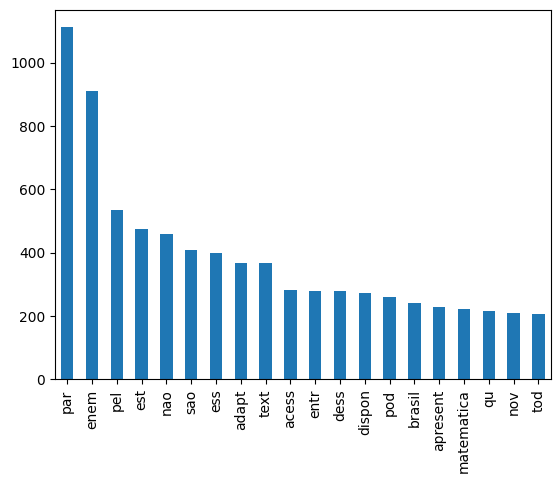

In [146]:
documentTermMatrix = pd.DataFrame(tags_count.toarray(), columns=vectorizer.get_feature_names_out())
termDocumentMatrix = documentTermMatrix.T
termDocumentMatrix['total_count'] = termDocumentMatrix.sum(axis=1)
termDocumentMatrix = termDocumentMatrix.sort_values(by ='total_count',ascending=False)
termDocumentMatrix[:20]['total_count'].plot.bar()

## Referências

 - [https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c](https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c)
 - [https://okan.cloud/posts/2021-04-08-text-vectorization-using-python-term-document-matrix/](https://okan.cloud/posts/2021-04-08-text-vectorization-using-python-term-document-matrix/)
 - [https://medium.com/analytics-vidhya/tdm-term-document-matrix-and-dtm-document-term-matrix-8b07c58957e2](https://medium.com/analytics-vidhya/tdm-term-document-matrix-and-dtm-document-term-matrix-8b07c58957e2)
 - [https://en.wikipedia.org/wiki/Document-term_matrix](https://en.wikipedia.org/wiki/Document-term_matrix)
 - [https://brasilescola.uol.com.br/educacao/o-que-e-enem.htm](https://brasilescola.uol.com.br/educacao/o-que-e-enem.htm)
 - [https://www.alura.com.br/artigos/lemmatization-vs-stemming-quando-usar-cada-uma](https://www.alura.com.br/artigos/lemmatization-vs-stemming-quando-usar-cada-uma)
 - [https://www.alura.com.br/artigos/guia-nlp-conceitos-tecnicas](https://www.alura.com.br/artigos/guia-nlp-conceitos-tecnicas)
 - [https://www.nltk.org/howto/portuguese_en.html](https://www.nltk.org/howto/portuguese_en.html)
 - [https://dadosaocubo.com/nlp-com-scikit-learn/](https://dadosaocubo.com/nlp-com-scikit-learn/)
 - [https://download.inep.gov.br/educacao_basica/enem/downloads/2022/presskit/Press_kit_Enem_2022.pdf](https://download.inep.gov.br/educacao_basica/enem/downloads/2022/presskit/Press_kit_Enem_2022.pdf)